<a href="https://colab.research.google.com/github/Sudeep-KS/Melanoma_Detection/blob/main/Sudeep_K_S_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Melanoma Detection Assignment**<br><br>
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Importing all the important libraries**

In [ ]:
#Importing necessary library 
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from glob import glob

**Importing Skin Cancer Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Loading the data set of test and tarin
root_path="/content/gdrive/MyDrive/ML/Melanoma_Detection"
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [ ]:
# Counting number of images in each of the data set 
#Train
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
#Test
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
# initialisation 
batch_size = 32
img_height = 180
img_width = 180

Splitting DataSet for Training and Validation.

In [ ]:
#Train datset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir_train,
   batch_size=batch_size,
   image_size=(img_height,img_width),
   label_mode='categorical',
   seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
#Validation Dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    label_mode='categorical',
    seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
#all different classes/categories of cancer
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the data**<br>
A plot to show all the classes/categories of cancr present in our dataset

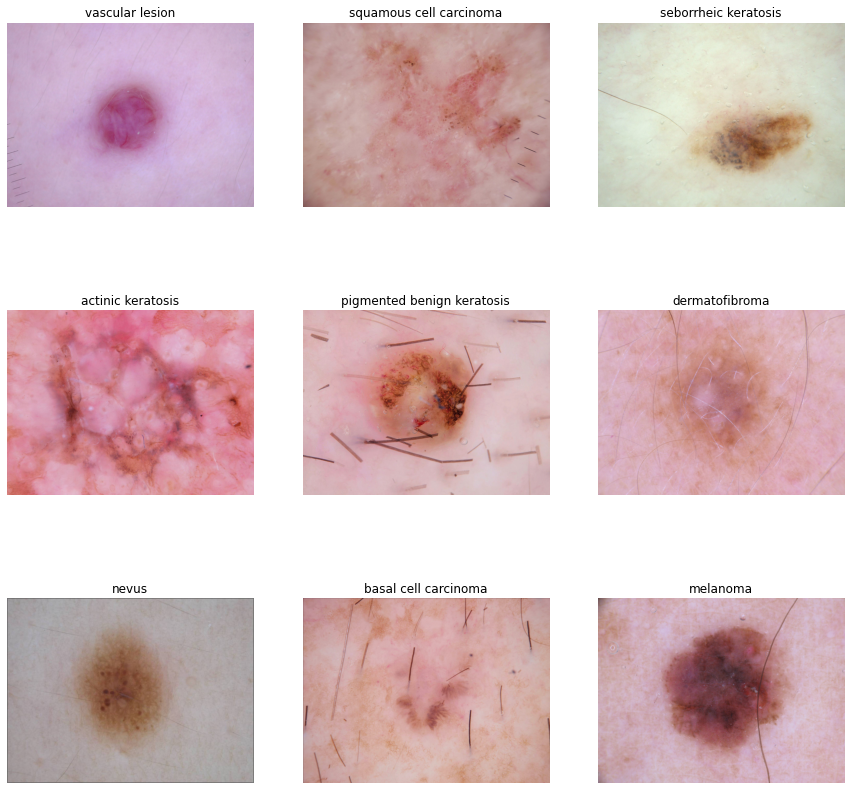

In [ ]:
# Visualize the all the different types of cancers
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
num=0
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1


train_ds.cache() keeps the images in memory after they're loaded off disk during the first epoch.

val_ds.cache.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Creating a CNN Model**<br>


In [ ]:
input_shape = (img_height,img_width,3)

model = Sequential() 
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())  
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(len(class_names),activation='softmax'))

**Compiling the CNN Model**<br>

In [ ]:
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

**Training The Model**

In [ ]:
#training 1st model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 509s 3s/step - loss: 1.8633 - accuracy: 0.3220 - val_loss: 1.7065 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 101s 2s/step - loss: 1.5628 - accuracy: 0.4531 - val_loss: 1.4447 - val_accuracy: 0.5235
Epoch 3/20
56/56 [==============================] - 98s 2s/step - loss: 1.4738 - accuracy: 0.4855 - val_loss: 1.4838 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 100s 2s/step - loss: 1.4042 - accuracy: 0.4961 - val_loss: 1.4107 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 98s 2s/step - loss: 1.2732 - accuracy: 0.5608 - val_loss: 1.3656 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 98s 2s/step - loss: 1.1879 - accuracy: 0.5776 - val_loss: 1.3765 - val_accuracy: 0.5481
Epoch 7/20
56/56 [==============================] - 100s 2s/step - loss: 1.1060 - accuracy: 0.6133 - val_loss: 1.4278 - val_accuracy: 0.5145
Epoch 8/20
56/56

**Visualizing the training Results**

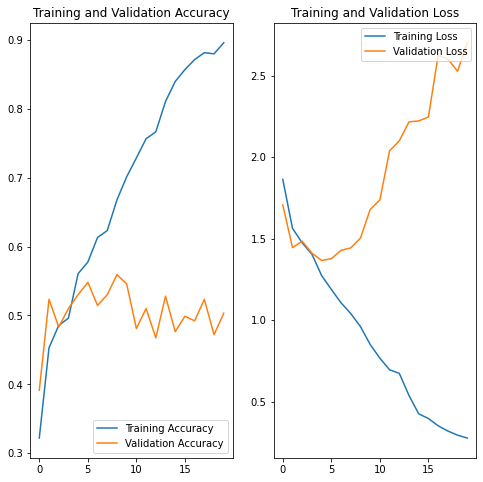

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings Model 1**

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

14/14 [==============================] - 6s 434ms/step - loss: 2.7018 - accuracy: 0.5034
Accuracy 0.9268973469734192
loss 0.1884922981262207
val_accuracy 0.5033556818962097
val_loss 2.7018415927886963


In [ ]:
# After analysing the model fit history for presence of underfit or overfit, choosing an appropriate data augumentation strategy. 
#Data augumentation
rescale = tf.keras.Sequential([
  #Rescaling the RGB values between 0 to 1
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)    
])

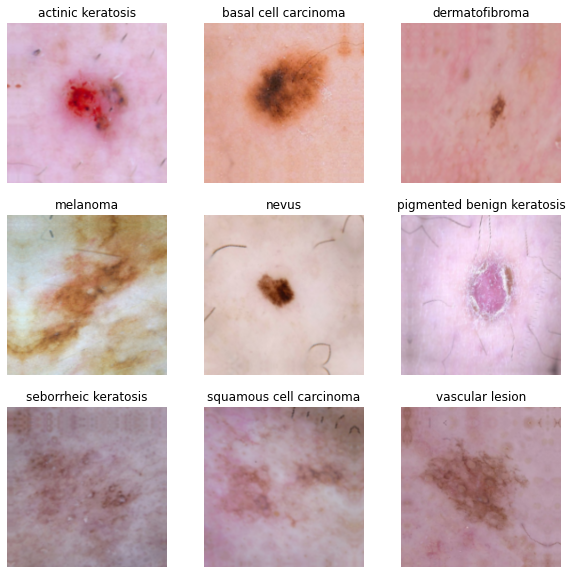

In [43]:
#Visualize how your augmentation strategy works for one instance of training image.
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_images = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_images[i],np.int32)
  plt.title(class_names[i])
  plt.imshow((augmented_image1))
  plt.axis("off")

**Model 2**

In [ ]:
model2 = Sequential()                   

model2.add(data_augmentation)          
model2.add(rescale)                     

#First
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
#second
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

model2.add(layers.Dropout(0.25))
# third
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(128,activation='relu'))
#Droping
model2.add(layers.Dropout(0.50))
model2.add(layers.Dense(len(class_names),activation='softmax'))

**Compiling Model 2**

In [ ]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

**Training Model 2**

In [ ]:
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20
56/56 [==============================] - 134s 2s/step - loss: 2.4601 - accuracy: 0.1864 - val_loss: 2.0614 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 131s 2s/step - loss: 2.0017 - accuracy: 0.2517 - val_loss: 1.8802 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 129s 2s/step - loss: 1.8523 - accuracy: 0.3047 - val_loss: 1.7280 - val_accuracy: 0.4139
Epoch 4/20
56/56 [==============================] - 130s 2s/step - loss: 1.8155 - accuracy: 0.3482 - val_loss: 1.6549 - val_accuracy: 0.4430
Epoch 5/20
56/56 [==============================] - 130s 2s/step - loss: 1.7086 - accuracy: 0.3834 - val_loss: 1.6705 - val_accuracy: 0.4407
Epoch 6/20
56/56 [==============================] - 128s 2s/step - loss: 1.6915 - accuracy: 0.4102 - val_loss: 1.6315 - val_accuracy: 0.4094
Epoch 7/20
56/56 [==============================] - 133s 2s/step - loss: 1.6232 - accuracy: 0.4280 - val_loss: 1.5514 - val_accuracy: 0.4855
Epoch 8/20
56

**Visualizing the Training of Model2**

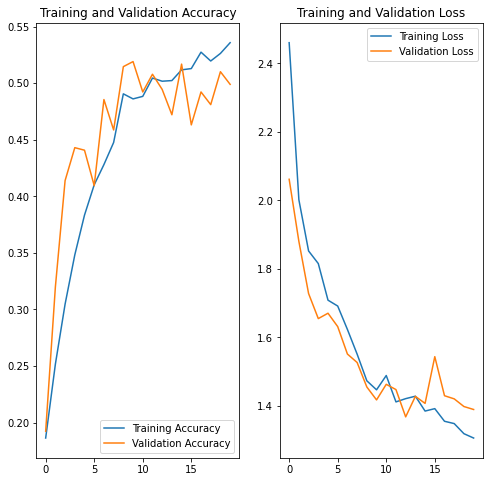

In [ ]:
#accuracy graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings Model 2**

In [ ]:
loss, accuracy = model2.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model2.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

14/14 [==============================] - 7s 493ms/step - loss: 1.3896 - accuracy: 0.4989
Accuracy 0.5217633843421936
loss 1.295228362083435
val_accuracy 0.49888142943382263
val_loss 1.3895854949951172


**Finding Distribution Classes in training Dataset**

In [ ]:
def class_distribution_count(directory):
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
 
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    

    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,vascular lesion,139
1,squamous cell carcinoma,181
2,seborrheic keratosis,77
3,actinic keratosis,114
4,pigmented benign keratosis,462
5,dermatofibroma,95
6,nevus,357
7,basal cell carcinoma,376
8,melanoma,438


<BarContainer object of 9 artists>

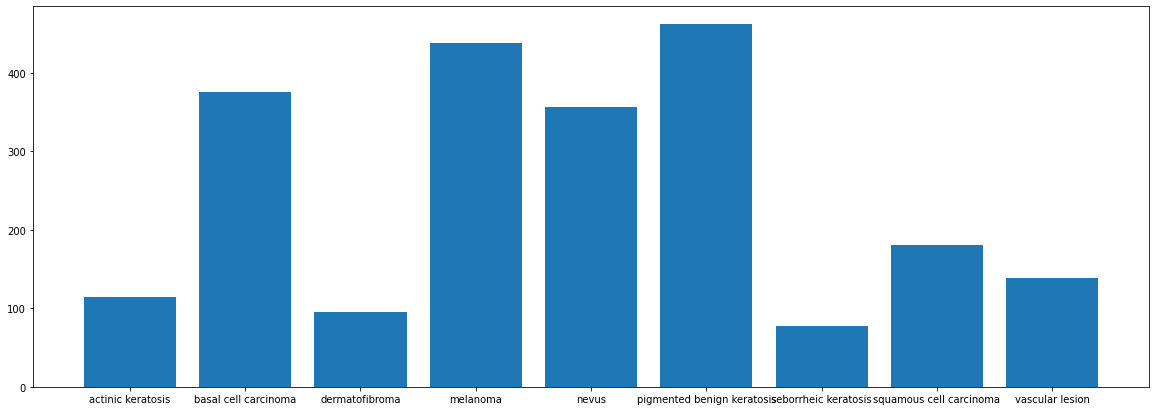

In [ ]:
# Count 
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(20,7))
plt.bar(class_names,count)

**Findings**<br>



*   Seborrheic Keratosis has the least number of samples.
*   Melanoma and Pigmented benign keratosis classes dominate the data.
*   Actinic keratosis and Dermatofibroma have proportionate number of classes.







**Rectifying Class Imbalance**

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
import os
import warnings
warnings.filterwarnings('ignore')
import keras
import glob

In [ ]:
# We are adding 500 samples per class to make sure that none of the classes are sparse.
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/ML/Melanoma_Detection/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F77073E7750>: 100%|██████████| 500/500 [01:08<00:00,  7.26 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7707F09050>: 100%|██████████| 500/500 [00:48<00:00, 10.40 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7707451710>: 100%|██████████| 500/500 [00:57<00:00,  8.74 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F770A28E490>: 100%|██████████| 500/500 [00:53<00:00,  9.39 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F770A7AEDD0>: 100%|██████████| 500/500 [00:52<00:00,  9.60 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F770A417490>: 100%|██████████| 500/500 [00:54<00:00,  9.25 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F770A7F3310>: 100%|██████████| 500/500 [00:45<00:00, 11.10 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F77073F10D0>: 100%|██████████| 500/500 [00:53<00:00,  9.31 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F770AB98710>: 100%|██████████| 500/500 [00:53<00:00,  9.33 Samples/s]


In [ ]:
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


**Creating Training DataSet**

In [ ]:
data_dir_train="/content/gdrive/MyDrive/ML/Melanoma_Detection/Train/output" 

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,  
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical', 
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


**Creating Validation DataSet**

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


**Model 3**

In [ ]:
model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))
#Second
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))
#Third
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))
#Dropout
model3.add(layers.Dropout(0.50))
#Batch normalization
model3.add(layers.BatchNormalization())

#Dense
model3.add(layers.Dense(len(class_names),activation='softmax'))

**Compiling Model 3**

In [ ]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

**Training Model3**

In [ ]:
epochs = 40
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/40
113/113 [==============================] - 217s 2s/step - loss: 2.4276 - accuracy: 0.2056 - val_loss: 2.3612 - val_accuracy: 0.3133
Epoch 2/40
113/113 [==============================] - 191s 2s/step - loss: 1.8224 - accuracy: 0.3806 - val_loss: 2.3307 - val_accuracy: 0.2322
Epoch 3/40
113/113 [==============================] - 187s 2s/step - loss: 1.6015 - accuracy: 0.4514 - val_loss: 1.8753 - val_accuracy: 0.4011
Epoch 4/40
113/113 [==============================] - 193s 2s/step - loss: 1.4814 - accuracy: 0.4869 - val_loss: 1.7316 - val_accuracy: 0.4344
Epoch 5/40
113/113 [==============================] - 185s 2s/step - loss: 1.4287 - accuracy: 0.5044 - val_loss: 1.5702 - val_accuracy: 0.4622
Epoch 6/40
113/113 [==============================] - 184s 2s/step - loss: 1.3835 - accuracy: 0.5206 - val_loss: 1.6999 - val_accuracy: 0.3878
Epoch 7/40
113/113 [==============================] - 186s 2s/step - loss: 1.2971 - accuracy: 0.5425 - val_loss: 1.4233 - val_accuracy: 0.4878

**Visualizing the Training of Model3**

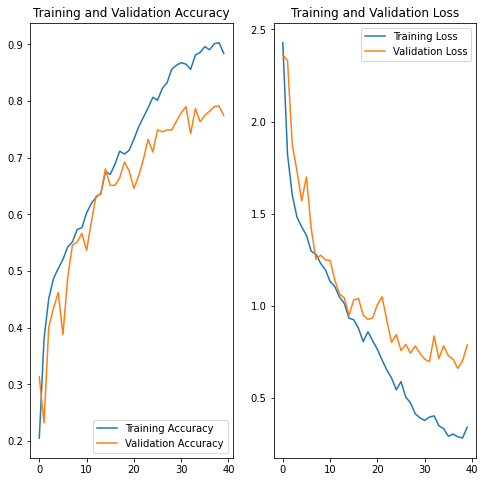

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Analysis of Model3**<br>


*   The class rebalance helped in reducing overfititng of the data<br>
*   The Model can be further improved by tuning the hyperparameter<br>
*   The Model accuracy increased by adding more epochs<br>
*   The Model Accuracy on training data has increased by using Augmentor library








In [ ]:
loss, accuracy = model3.evaluate(train_ds, verbose=1)
val_loss, val_accuracy = model3.evaluate(val_ds, verbose=1)

print("Accuracy", accuracy)
print("loss", loss)
print("val_accuracy", val_accuracy)
print("val_loss", val_loss)

29/29 [==============================] - 13s 403ms/step - loss: 0.7883 - accuracy: 0.7744
Accuracy 0.9433333277702332
loss 0.16901427507400513
val_accuracy 0.7744444608688354
val_loss 0.7882716059684753


**Final Result**


*  Accuracy ~94.33%
*  Validation Accuracy is ~77.4%

